In [22]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import filters as skfilt
from skimage.measure import label
from skimage.measure import regionprops
from skimage.color import label2rgb

In [2]:
sys.path.append('/Users/mm40108/projects/datadays17/olfactory_protein_viz/src/')
from ecallen.ecallen import images as ecimg
from features.image_processing import process_raw_images_in
from visualization.make_plots import plot_expanding_rows, plot_channels

THIS_DIR = "/Users/mm40108/projects/datadays17/olfactory_protein_viz/src/features"
DATA_DIR = "/Users/mm40108/projects/datadays17/olfactory_protein_viz/data"

In [4]:
# lets grab processed images from one experiment
organism = 'DevMouse'
protein = 'Bmpr2'
experiment = '100042306'

img_dict = process_raw_images_in(organism, protein, experiment, crop = 'OB')
print(img_dict.keys())

crop:  OB

processing raw images for experiment:
	 {'plane_of_section': 'sagittal', 'red_channel': None, 'green_channel': None, 'blue_channel': None, 'is_FISH': False, 'is_ISH': True, 'probes': ['bmpr2'], 'section_thickness': 25.0, 'genotype': '350-1888'}
read_images_in( /Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306 ): /Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/10_100878687.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/11_100878705.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/12_100878600.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/13_100878599.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/14_100878601.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/15_100878666.jpg
	/Users/m

/Users/mm40108/projects/datadays17/olfactory_protein_viz/venv/lib/python3.6/site-packages/PIL/Image.py:2509: DecompressionBombWarning: Image size (114636032 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/Users/mm40108/projects/datadays17/olfactory_protein_viz/venv/lib/python3.6/site-packages/PIL/Image.py:2509: DecompressionBombWarning: Image size (122435072 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/Users/mm40108/projects/datadays17/olfactory_protein_viz/venv/lib/python3.6/site-packages/PIL/Image.py:2509: DecompressionBombWarning: Image size (95477760 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/Users/mm40108/projects/datadays17/olfactory_protein_viz/venv/lib/python3.6/site-packages/PIL/Image.py:2509: DecompressionBombWarning: Image size (113417472 pixels) exceeds limit of 89478485 pixels, c

x_from 2000
x_to 7000
y_to 5000
(7952, 14416, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(8992, 13616, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(8064, 11840, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(7424, 10368, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(7152, 10816, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(8176, 13872, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(7120, 11536, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(8320, 14848, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(8400, 13952, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(8832, 14848, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(7648, 11600, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(7680, 13440, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(7184, 10864, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(8256, 14208, 3)
no special channels
x_from 2000
x_to 7000
y_to 5000
(8

In [7]:
print(img_dict.keys())
img_file = '/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/10_100878687.jpg'

dict_keys(['/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/10_100878687.jpg', '/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/11_100878705.jpg', '/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/12_100878600.jpg', '/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/13_100878599.jpg', '/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/14_100878601.jpg', '/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/15_100878666.jpg', '/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/16_100878636.jpg', '/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/17_100878688.jpg', '/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/18_100878706.jpg', '/Users/mm40108/projects/d

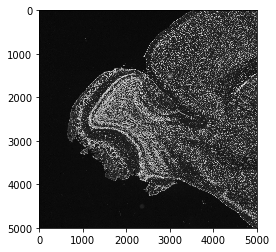

In [10]:
# let's threshold on one image
img = img_dict[img_file]['monochrome']
plt.imshow(img, cmap='gray')

{'thresh_yen': 78, 'thresh_otsu': 77, 'thresh_li': 54.97831004892648, 'thresh_iso': 76}


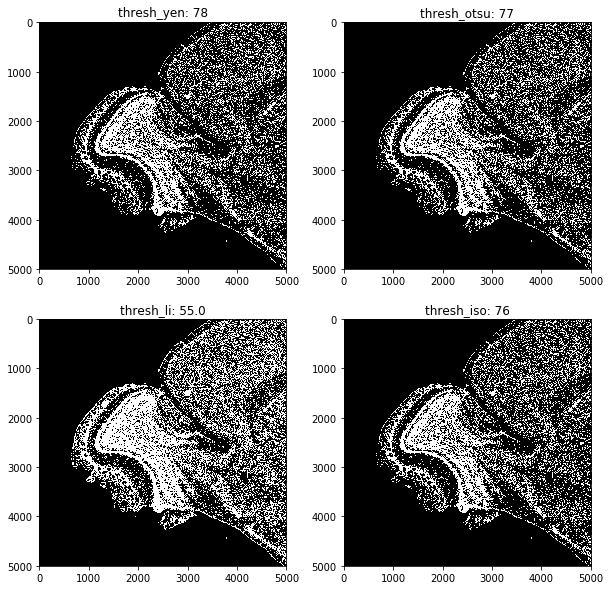

In [16]:
thresholds = {
    "thresh_yen": skfilt.threshold_yen(img),
    "thresh_otsu": skfilt.threshold_otsu(img),
    "thresh_li": skfilt.threshold_li(img),
    "thresh_iso": skfilt.threshold_isodata(img)
}
print(thresholds)
 
threshold_fig = plt.figure(figsize=(10,10))
for i, thresh_type in enumerate(thresholds.keys()):
    thresh_val = thresholds[thresh_type]
    ax = threshold_fig.add_subplot(2, 2, i+1)
    ax.imshow(img>thresh_val, interpolation='nearest', cmap='gray')
    ax.set_title(thresh_type + ": {}".format(np.round(thresholds[thresh_type])))
 
plt.show()

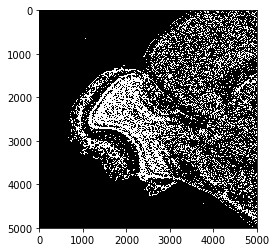

In [18]:
# let's use thresh_iso
# (allow user to pick threshold)
chosen = 'thresh_iso'
thresh = thresholds[chosen]

bw_img = img > thresh_val
plt.imshow(bw_img, interpolation='nearest', cmap='gray')

In [25]:
# get coords
label_img = label(bw_img)
region_metrics = regionprops(label_img)

print(label_img[0])
print(region_metrics[0])

[0 0 0 ... 0 0 0]


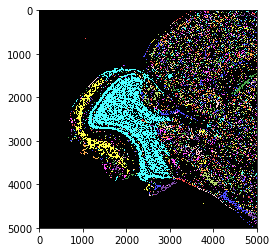

In [28]:
# color each neuron
binary_img_with_labels = label2rgb(label_img,
                                   image=bw_img,
                                   alpha=0.7,
                                   bg_label=0,
                                   bg_color=(0, 0, 0),
                                   image_alpha=1,
                                   kind='overlay'
                                   )
plt.imshow(binary_img_with_labels, interpolation='Nearest', origin='upper')

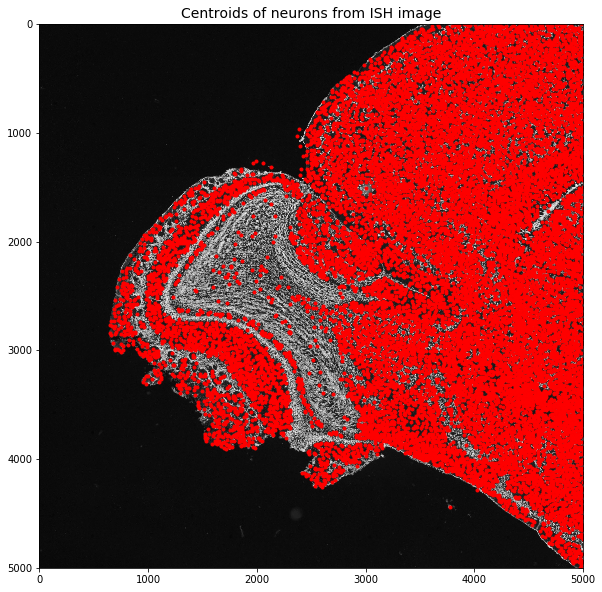

In [31]:
# grab the X and Y pixels at the center of each labeled region
cell_x_pix = [roi['centroid'][1] for roi in region_metrics if roi['area'] > 20]
cell_y_pix = [roi['centroid'][0] for roi in region_metrics if roi['area'] > 20]
 
 
# plot the brain image to verify the (X,Y) locations
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.imshow(img,
          cmap='gray',
          interpolation='Nearest',
          origin='upper'
          )
ax.plot(cell_x_pix, cell_y_pix, 'r.')
ax.set_title('Centroids of neurons from ISH image', fontsize=14)
plt.show()

In [ ]:
# TODO: blobs

In [ ]:
# TODO: segmenting here
# TODO: morphological image processing